# Analysis of Online Retail Dataset

The demand for online purchase has exponentially increased with the evolution of mobiles and the shift from calling to browsing. This market has proven to have a global reach than being confined to a physical location and demand for its customers physical presence.

An online retail company, a non-store-based venture, has been logging its sales and customer details. A few of the e-visitors either do not complete their shopping or products have been returned with many comments. This leads for the need of business solution by the company to prevent its losses and increase the revenue. 

### Feature information:
1. InvoiceNo- Invoice printed has unique id
2. StockCode - Products are segemented with unique code
3. Description - Product description.
4. Quantity - Number of products purchased
5. InvoiceDate - The day product was purchased written in invoice.
6. UnitPrice - The price of 1 prduct
7. CustomerID - Unique ID given to customer by the company
8. Country - Country from which purchase is made

## Problem Statement:-

### Segmentation of stock based on frequency of purchase, quantity of purchase of stocks to enable better inventory management.

The company sells a vast range of products to customers in various locations that would involve shipping. Also, the rate of purchase is not common throughout the year.The movement of products from the shelves also varies. Considering that the product is gift item, it becomes imperative that the stocks be available on demand to ensure that the delivery dates are met. How do we classify the products under different classes to ensure proper availability of stock, to avoid delays of delivery and also to avoid a particular product staying in the shelves for too long?

## Importing Libraries and reading dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
retail= pd.read_csv('Online_Retail_Service.csv', encoding='latin-1')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


### Analysing data to get information like size, datatype, null values and 5 point summary

In [3]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134695
Country             0
dtype: int64

In [4]:
retail.shape

(532619, 8)

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null object
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB


In [6]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,532619.000000,532619.000000,397924.000000
mean,10.240010,3.847635,15294.315171
std,159.573967,41.758101,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [7]:
round((retail.isnull().sum()/retail.shape[0])*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.29
Country         0.00
dtype: float64

#### Inference: 
1. Data consists of 5 lakhs + observations/ transactions with 8 features. 
2. There are 3 numerical and 5 category features. 
3. Maximum quantity of purchase is 80K+ units which gives denotes wholesale selling
4. Five point summary for numerical features minimum have negative value and invoiceDate is in string format which has to be converted. Data Cleaning is required.  
5. Both Unitprice and quantity features 75% of data seems to have small scale purchase. 
6. 25% of customers id entry is missing and 0.27% data description.

### Data Cleaning 

#### 1. Deleting negative and zero values from unit price as price of a product cannot be either 

In [8]:
retail=retail[retail.UnitPrice>0]
retail.shape

(530104, 8)

In [9]:
(retail.Quantity<0).any()

False

##### Inference: Removing 0 and negative values in unit price has deleted negative quantities too.

#### 2. Let's convert stock code in upper case if there are some data entry error. Description seems to have a few null values. Lets Verify with the stock code and remove if there are unwanted items.

In [10]:
retail['StockCode']=retail['StockCode'].str.upper()

In [11]:
retail.groupby('StockCode')['Description'].agg(pd.Series.mode)

StockCode
10002                  INFLATABLE POLITICAL GLOBE 
10080                     GROOVY CACTUS INFLATABLE
10120                                 DOGGY RUBBER
10123C                       HEARTS WRAPPING TAPE 
10124A                 SPOTS ON RED BOOKCOVER TAPE
                               ...                
GIFT_0001_50    Dotcomgiftshop Gift Voucher £50.00
M                                           Manual
PADS                    PADS TO MATCH ALL CUSHIONS
POST                                       POSTAGE
S                                          SAMPLES
Name: Description, Length: 3812, dtype: object

#####  Inference: We can see 3812 different types of product ordered but some of'em contains description like manual, voucher,bad debt, amazon fee etc. As we are mainly focusing on inventory management, these items needs to be removed for better clusters to be formed.

In [12]:
Items_tobe_deleted = ["m","M","S","POST","AMAZONFEE","GIFT_0001_50","GIFT_0001_40","GIFT_0001_30","GIFT_0001_20",
                      "GIFT_0001_10","DOT","BANK CHARGES","B",'22016']
for item in Items_tobe_deleted:
    retail=retail[retail.StockCode!= item]

In [13]:
retail.shape

(527901, 8)

In [14]:
retail.drop('CustomerID',axis=1, inplace=True)

In [15]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

##### Inference: The dataset is cleaned with inventory stocks and no null values. 

## Feature Engineering

### Let's have a dataframe to update features which helps us in model building

In [16]:
Stock= pd.DataFrame()

### 1.  Each product inventory needs are taken care, hence finding the sales revenue which each stock brings in. Sales is calculated by multiplying unit price with number of items purchased. 

In [17]:
retail['Sales']=retail['UnitPrice']*retail['Quantity']
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,United Kingdom,20.34


In [18]:
sales= retail.groupby('StockCode')['Sales'].sum()
sales=sales.reset_index()
sales.columns=['StockCode','Total_Sales']
sales.head(2)

,StockCode,Total_Sales
0,10002,759.89
1,10080,119.09


#### Updating our main dataframe

In [19]:
Stock=sales.copy()
Stock.shape

(3799, 2)

In [20]:
Stock['Total_Sales'].max()

174484.74000000025

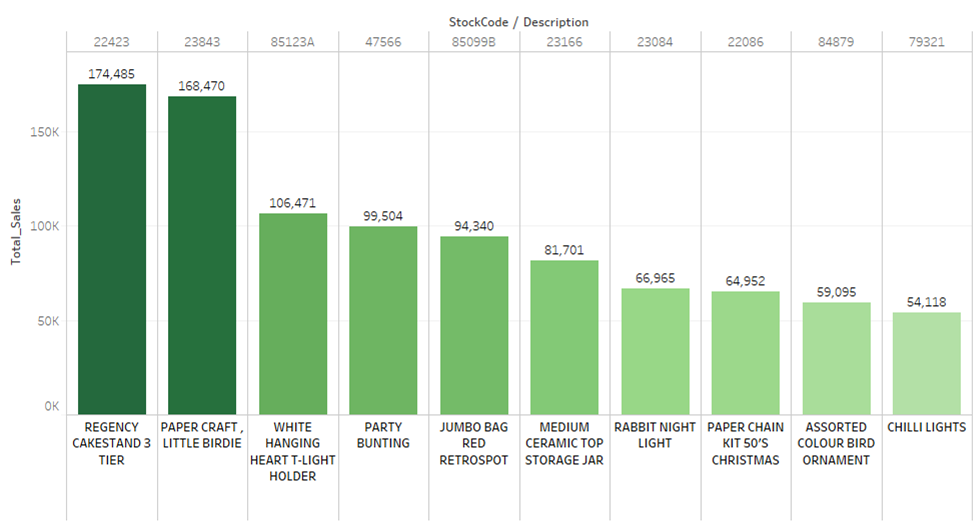

1. Stock REGENCY CAKESTAND 3 TIER has the maximum sales with 174K pounds revenue.
2. Offers can be given on the same for wholesale purchases and inventory can be increased.
3. The range of sales for stocks is from 174K pounds to 55K pounds for only 10 stocks. This denotes that cluster size with more revenue might be less.


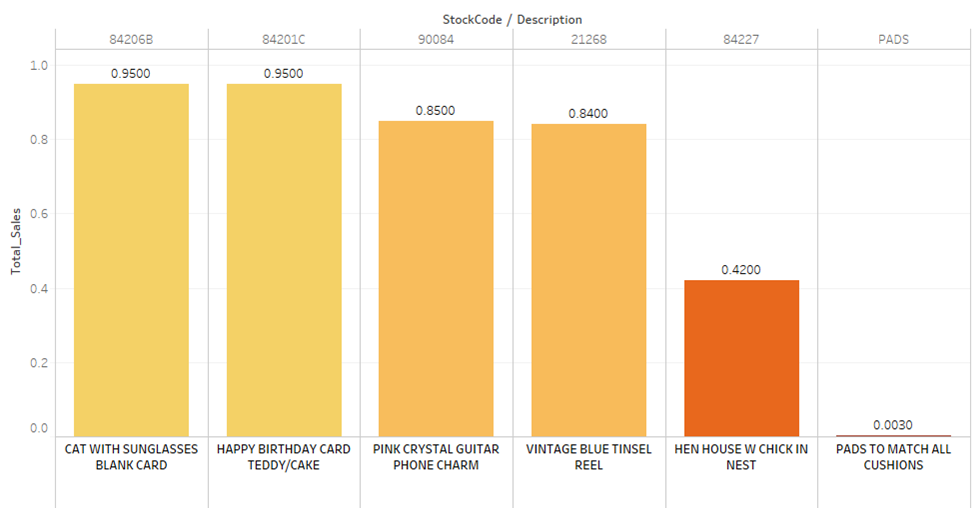

1. Six products yeild less than 1 pound per year. 
2. Such stocks can be omitted from future purchasing

### 2. Though sales of each product is considered, quantity purchased will denote number of times the product was ordered. By taking a sum, insight on the demand of product can be determined.

In [21]:
quantity= retail.groupby('StockCode')['Quantity'].sum()
quantity=quantity.reset_index()
quantity.columns=['StockCode','Total_Quantity_Purchase']
quantity.head(2)

,StockCode,Total_Quantity_Purchase
0,10002,860
1,10080,303


In [22]:
Stock=pd.merge(Stock,quantity, on='StockCode')
Stock.head(2)

,StockCode,Total_Sales,Total_Quantity_Purchase
0,10002,759.89,860
1,10080,119.09,303


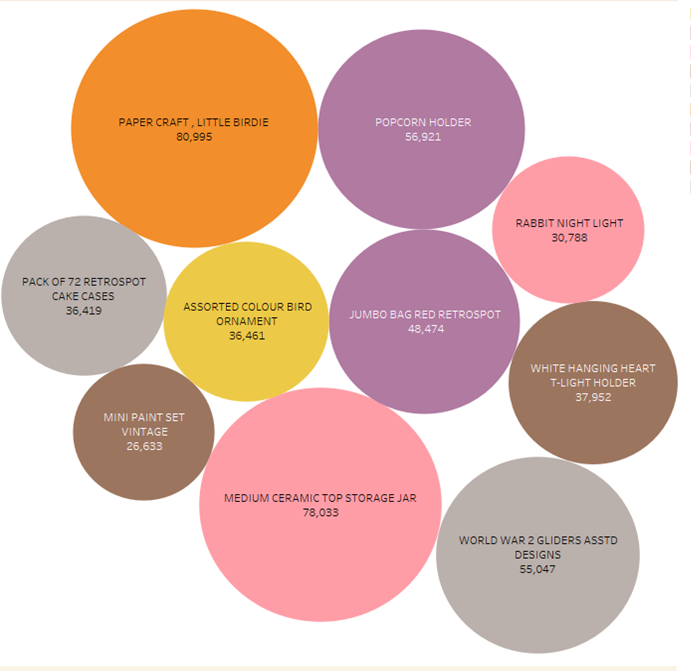

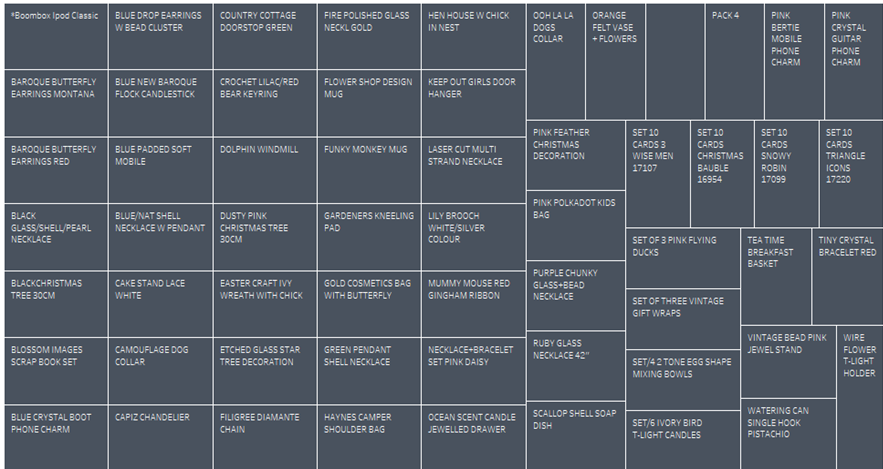

1. Top 10 quantity sold rangs from 88K to 55K which showes the company is catering to large scale markets
2. A smaller frequency of this cluster can be expected 
3. 58 out of 3799 products were ordered only once in the entire year.  
4. Based on customer purchase, focusing less on the products rarely bought would be an ideal inventory solution.

### 3. Frequency of product bought will give us an idea of movement of product which helps in congregating products for better inventory.

In [23]:
print('There are',len(retail.InvoiceNo.value_counts()),'different invoices generated for products')

There are 19778 different invoices generated for products


In [24]:
frequency=retail.groupby('StockCode')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['StockCode','Frequency']
frequency.head(2)

,StockCode,Frequency
0,10002,71
1,10080,22


In [25]:
Stock=pd.merge(Stock,frequency, on='StockCode')
Stock.head(2)

,StockCode,Total_Sales,Total_Quantity_Purchase,Frequency
0,10002,759.89,860,71
1,10080,119.09,303,22


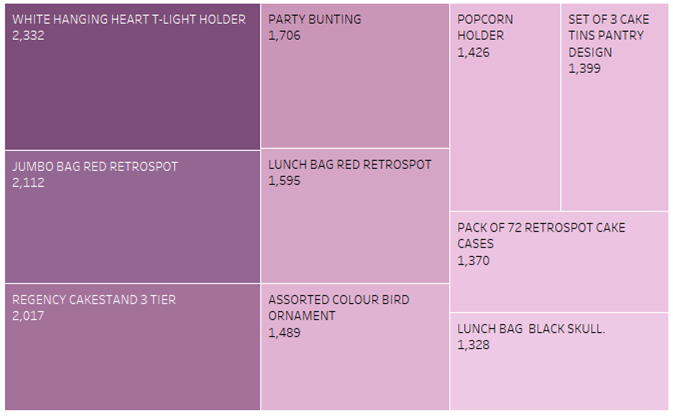

1. 10 of the mostly frequently seen products on customers cart is highlighted
2. The range is from 2k to 1.5k , which is the products seen on different invoices and depicts the demand for the product.

### 4. Finding mean diference between the dates of purchase for every product to find the products on demand

In [26]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d/%m/%Y %H:%M')
retail['InvoiceDate']=retail['InvoiceDate'].dt.date
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom,20.34


In [27]:
avg=[]
max_date=max(retail['InvoiceDate'])
stock_code=list(retail.StockCode.sort_values().unique())

for product in stock_code:
    date=retail[retail.StockCode==product]['InvoiceDate'].sort_values(ascending=True).unique()
    date=pd.DataFrame({'Date':date})
    date=date.reset_index()
    days=[]
    
    for i in range(len(date)):
        if len(date)==1:
            break;
        elif i==(len(date)-1):
            break;
        else:
            d=date.Date[i+1]-date.Date[i]
            d=d.days
            days.append(d)
            
    d=max_date-date.Date[(len(date)-1)]
    d=d.days
    days.append(d)
    average=sum(days)/len(days)
    avg.append(average)

In [28]:
Stock['Mean_diff_purchase']=avg
Stock.head(2)

,StockCode,Total_Sales,Total_Quantity_Purchase,Frequency,Mean_diff_purchase
0,10002,759.89,860,71,8.108696
1,10080,119.09,303,22,13.571429


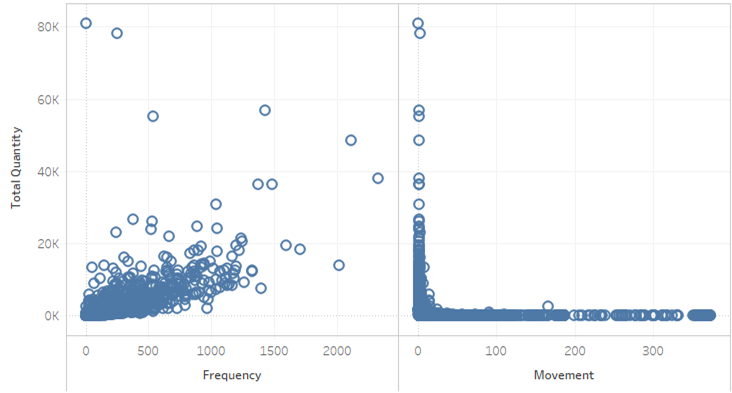

1. The Mean difference between purchase determine stocks movement. Whether the stocks or on the shelf for a log time or moving quicker. This is plotted against total quantity to compare between small scale and large scale buyers.
2. We can see both retail and wholesale buyers who buy frequently but only small-scale purchases are made occasionally.


## Further more investigation through visualization

In [29]:
description=retail.groupby('StockCode')["Description"].agg(pd.Series.mode)
description=description.reset_index()
description.columns=['StockCode','Description']

data=pd.merge(Stock,description, on ='StockCode')

data.to_csv('data.csv')


In [30]:
data.shape

(3799, 6)

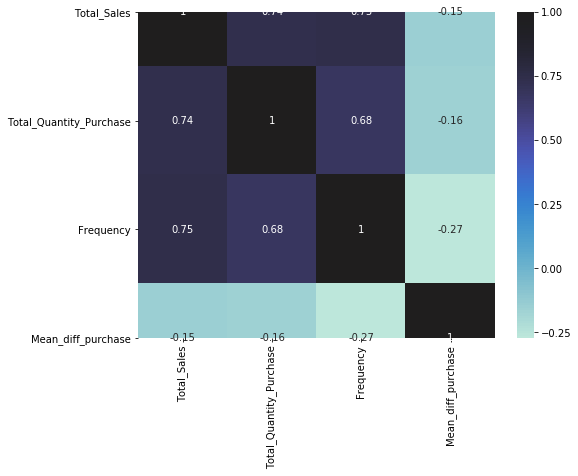

In [31]:
plt.subplots(figsize=(8,6))
sns.heatmap(Stock.corr(), annot=True , center=True)

##### Inference: 
1. Two features seems to have correlation, that is , total quantiy purchased and frequency as in normal terms, as visits increases, purchase is also increasing. Both indivually are valuable insights as differnce in quantity purchased can segregate the products.
2. Total quantity purchased per product is not much correlated with average sales which tells us both value of product is not high even when purchase is made. 

[]

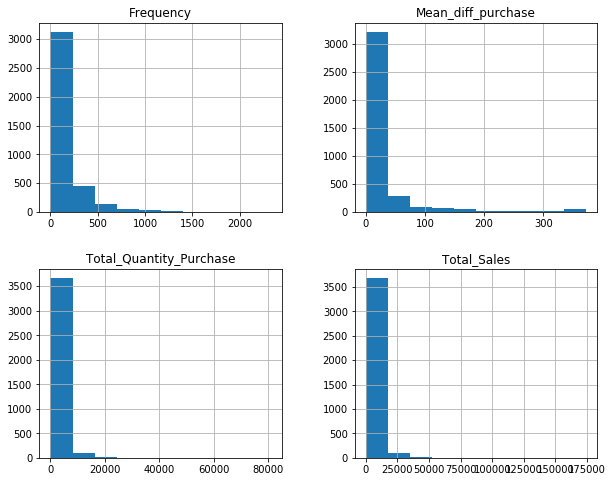

In [32]:
Stock.hist(figsize=(10,8))
plt.plot()

##### Inference:
1. Total sales for each product is between 0 to 51000.
2. Many product have been sold very less number of times and very few products are on high demand.
3. Many of the products movement are high/ consistant throughout the year and certain items are rarely purchased.
4. There are many retail buyers than wholesale. We can focus more on wholesale buyers as they bring in more sales.

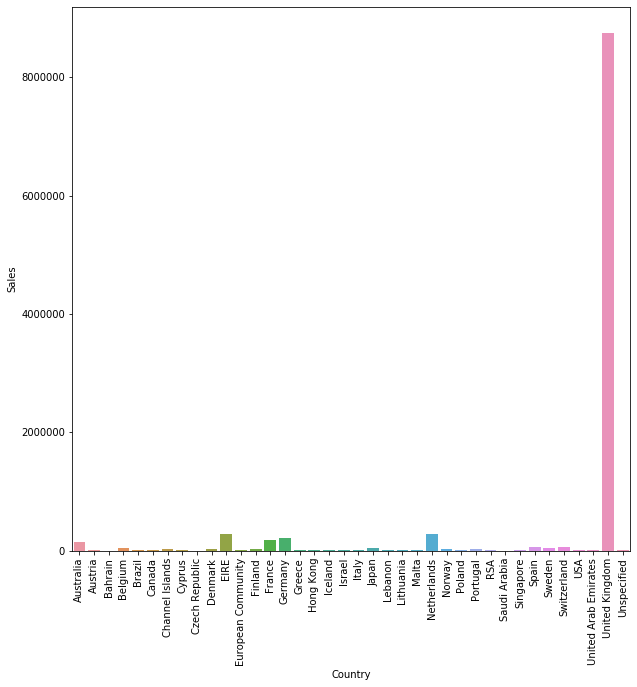

In [33]:
tx_revenue_country = retail.groupby(['Country'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='Country',y='Sales',data=tx_revenue_country)

##### Inference:
1. Online retail sales is based from UK and we can see sales are higher in the same region.
2. EIRE and Netherlands shares the second place in sales. This can be focused more as there a market established already.
3. We can see European countries are the better market place than others. Rest of the continents sales are very less. Inventory can be decentralised to increase sales.

# Suggestions which can help business in marketing and inventory 

## Unit price Standardization 
### We can see range of prices marked for a single product. These number are neither dependant on quantity nor on seasons. A standardized scale/ single price for each product will give an idea as to whether the prices can be increased or decreased in future based on demand and inventory.

In [34]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom,20.34


In [35]:
s=retail.groupby('StockCode')['UnitPrice'].unique()
s=s.reset_index()
s.columns=['Stock','Unitprice']
s.head(3)

,Stock,Unitprice
0,10002,"[0.85, 1.66, 1.63]"
1,10080,"[0.85, 0.39]"
2,10120,[0.21]


In [36]:
price_list=list(s.Unitprice.values)
unitprice=[]
for i in range(len(price_list)):
    if len(price_list[i])==1:
        unitprice.append(price_list[i][0])
    else:
        total=0
        for j in range(len(price_list[i])):
            total=total+price_list[i][j]
            
        length=len(price_list[i])
        avg_total=total/length
        unitprice.append(round(avg_total,2))
        
print(len(unitprice))

3799


In [37]:
Standardized_unitprice=pd.DataFrame({'Stock': s.Stock.values,'Base_price':unitprice})
Standardized_unitprice.head(5)

,Stock,Base_price
0,10002,1.38
1,10080,0.62
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


### Inference: We can see that StockCodes 23005, 23003, 20713, 23343, 85123A, 22617 are potentially outgoing stocks but are being rejected with reasons mentioned. Taking a little care and solving the issue can  help increase the sales.

# Building model

# K Means

In [38]:
Stock.head(2)

,StockCode,Total_Sales,Total_Quantity_Purchase,Frequency,Mean_diff_purchase
0,10002,759.89,860,71,8.108696
1,10080,119.09,303,22,13.571429


In [39]:
data.drop(['StockCode','Description'],1,inplace=True)
data.head()

,Total_Sales,Total_Quantity_Purchase,Frequency,Mean_diff_purchase
0,759.89,860,71,8.108696
1,119.09,303,22,13.571429
2,40.53,193,30,15.458333
3,3.25,5,3,123.666667
4,6.72,16,5,73.600000


In [40]:
from scipy.stats import zscore
data_scaled=data.apply(zscore)
data_scaled.head()

,Total_Sales,Total_Quantity_Purchase,Frequency,Mean_diff_purchase
0,-0.270277,-0.167317,-0.340536,-0.307333
1,-0.359292,-0.320578,-0.586074,-0.211177
2,-0.370205,-0.350845,-0.545986,-0.177964
3,-0.375384,-0.402574,-0.681283,1.726729
4,-0.374902,-0.399547,-0.671261,0.845451


In [41]:
from sklearn.cluster import KMeans
clusters=range(1,10)
error=[]
for num in clusters:
    model=KMeans(n_clusters=num, n_init=10, random_state=1)
    model.fit(data_scaled)
    error.append(model.inertia_)
    
kmeans=pd.DataFrame({'cluster':clusters,'error':error})
kmeans

,cluster,error
0,1,15196.000000
1,2,9921.584562
2,3,7040.449191
3,4,4885.566929
4,5,3687.300650
5,6,3108.233912
6,7,2691.499003
7,8,2326.229593
8,9,2049.371673


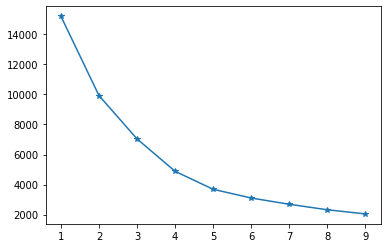

In [42]:
import matplotlib.pyplot as plt
plt.plot(kmeans.cluster, kmeans.error, marker='*')

In [43]:
model=KMeans(n_clusters=4, n_init=10, random_state=1)
model.fit(data_scaled)

KMeans(n_clusters=4, random_state=1)

In [44]:
pd.DataFrame(model.cluster_centers_, columns=data.columns)

,Total_Sales,Total_Quantity_Purchase,Frequency,Mean_diff_purchase
0,1.562645,1.532064,2.239462,-0.419998
1,-0.192903,-0.186262,-0.229184,-0.161230
2,-0.367958,-0.397882,-0.689136,3.979436
3,12.014902,11.507742,5.729586,-0.425187


In [45]:
data_k=data.copy()
data_k['label']=model.labels_
data_k.head(2)

,Total_Sales,Total_Quantity_Purchase,Frequency,Mean_diff_purchase,label
0,759.89,860,71,8.108696,1
1,119.09,303,22,13.571429,1


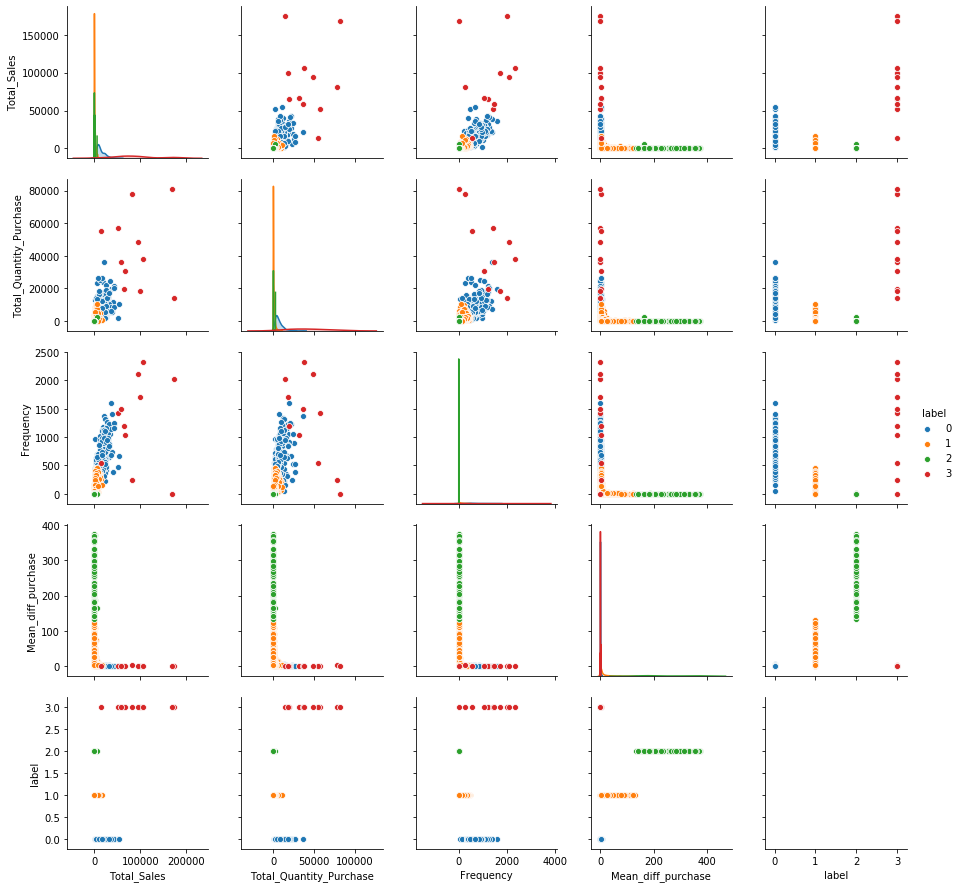

In [46]:
sns.pairplot(data=data_k, hue='label')

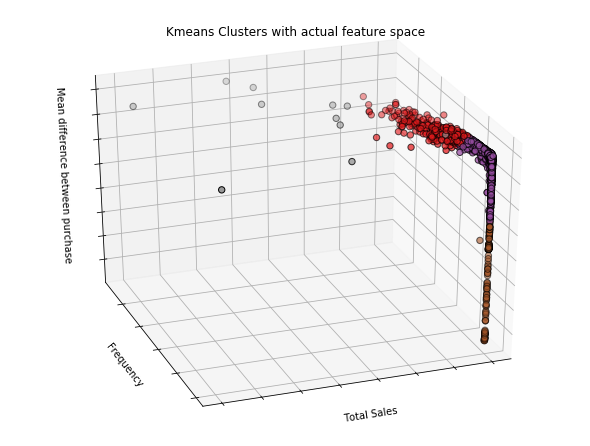

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=-250)
ax.scatter(data_k['Total_Sales'], data_k['Frequency'], data_k['Mean_diff_purchase'], c=model.labels_,
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("Kmeans Clusters with actual feature space")
ax.set_xlabel("Total Sales")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Frequency")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Mean difference between purchase")
ax.w_zaxis.set_ticklabels([])

plt.show()

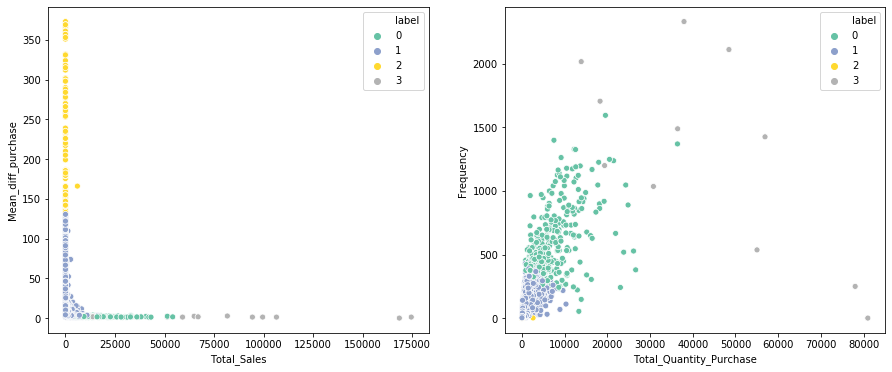

In [48]:
fig, ax= plt.subplots(1,2,figsize=(15,6))
sns.scatterplot(data_k.Total_Sales, data_k.Mean_diff_purchase , hue=data_k.label, ax=ax[0],palette='Set2' )
sns.scatterplot(data_k.Total_Quantity_Purchase, data_k.Frequency, hue=data_k.label, ax=ax[1],palette='Set2')

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled,model.labels_)

0.6853378854903304

In [50]:
model.inertia_

4885.566929421952

In [51]:
data_k['label'].value_counts()

1    3259
0     358
2     171
3      11
Name: label, dtype: int64

In [52]:
for i in [0,1,2,3]:
    print(data_k[data_k['label']==i].describe())

        Total_Sales  Total_Quantity_Purchase    Frequency  Mean_diff_purchase  \
count    358.000000               358.000000   358.000000          358.000000   
mean   13954.682737              7036.094972   585.868715            1.708017   
std     8922.441017              4947.547479   247.690435            0.560847   
min     1512.920000               875.000000    54.000000            1.125000   
25%     7562.000000              3633.000000   419.000000            1.397004   
50%    11307.185000              5850.000000   510.500000            1.587234   
75%    18544.185000              8864.750000   696.000000            1.801932   
max    54117.760000             36419.000000  1595.000000            7.612245   

       label  
count  358.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0  
        Total_Sales  Total_Quantity_Purchase    Frequency  Mean_diff_purchase  \
count   3259.000000              3259.000000  3259.000

# Inference: K means creates 4 clusters. 
##### 0- Stocks which are frequently bought and in high demand which bring in good income
##### 1- Stocks which are less frequently bought and bring low income.
##### 2- Stocks which are not frequently bought and bring in low income
##### 3- Stocks purchases are irregular and bring in high income.


### Key Insights
##### 0- Stocks bring in good income and good inventory needs to be maintained as demand is also high.(3K+ and less than 10K quantity)
##### 1- Stocks are bought less frequently. Though low income is generated, movement is maintained throug out the year. A moderate number of products can be stocked. (less than 1K quantity)
##### 2 - Stocks with low frequeny and very less income. These stocks can be omitted from future selling or very less number of products can be stocked. (less than 100 quantity)
##### 3-  Stocks which cater to wholesale market and bring in maximum income. A very large share of inventory must be invested in these products. This strategy can attract customers overseas due to high supply. (An average of 40K quantity)

# Moving on to hierarchial clustering as the K means algorithm gave a varied frequency clusters along with pretty high inertia

# Agglomerative

0.8127429925070886


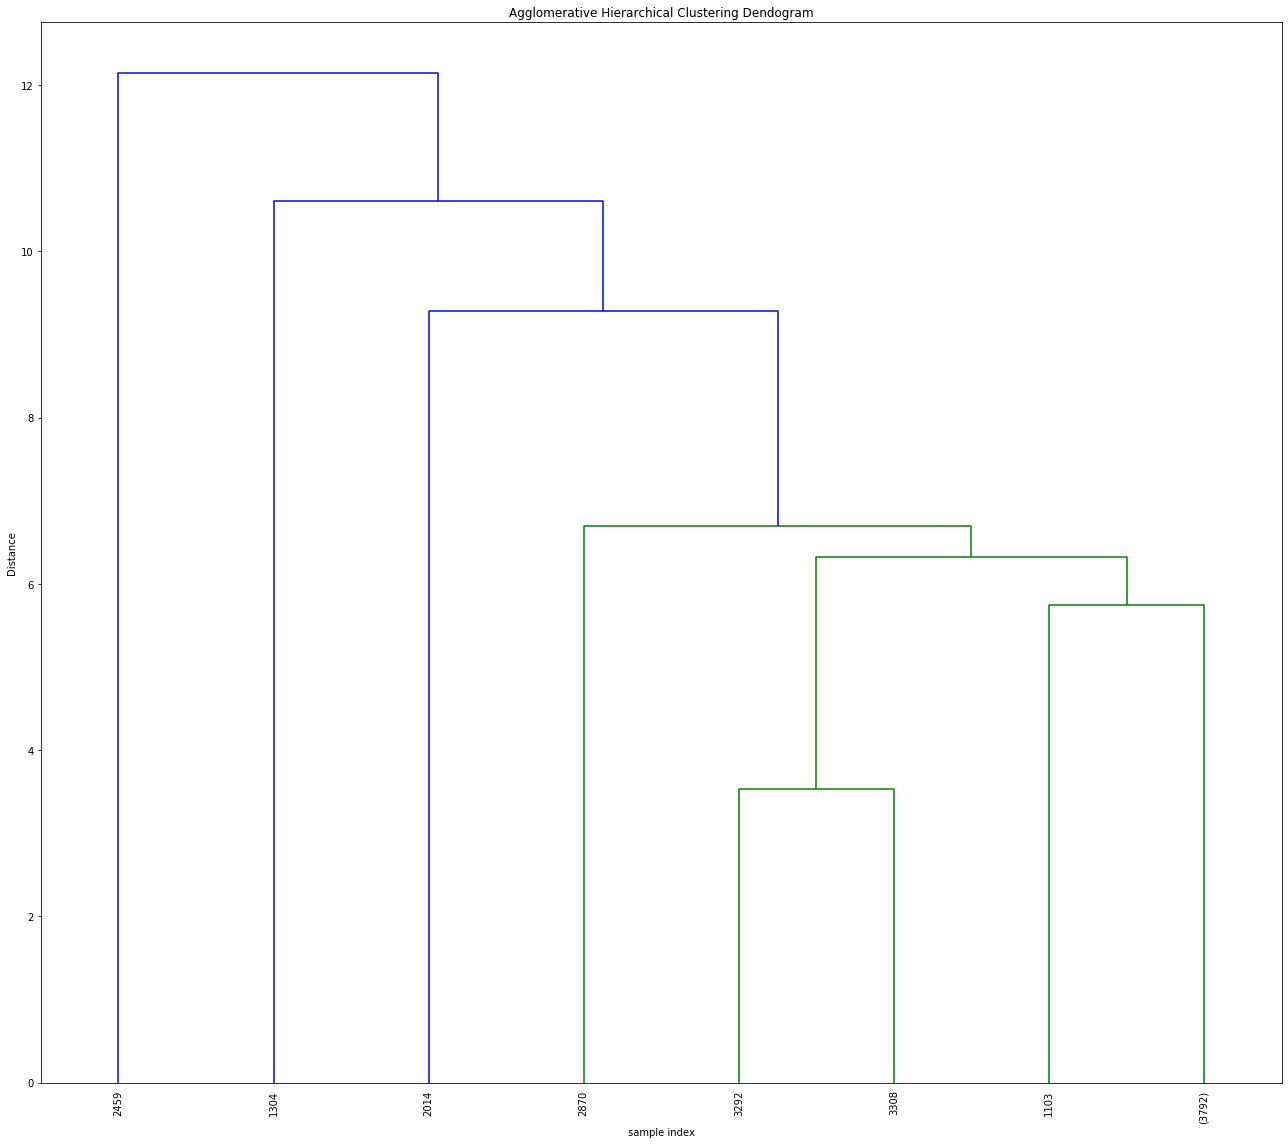

In [53]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(data_scaled, 'single')
c , cophenet_dist = cophenet(Z, pdist(data_scaled))
print(c)
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

0.8509475912145354


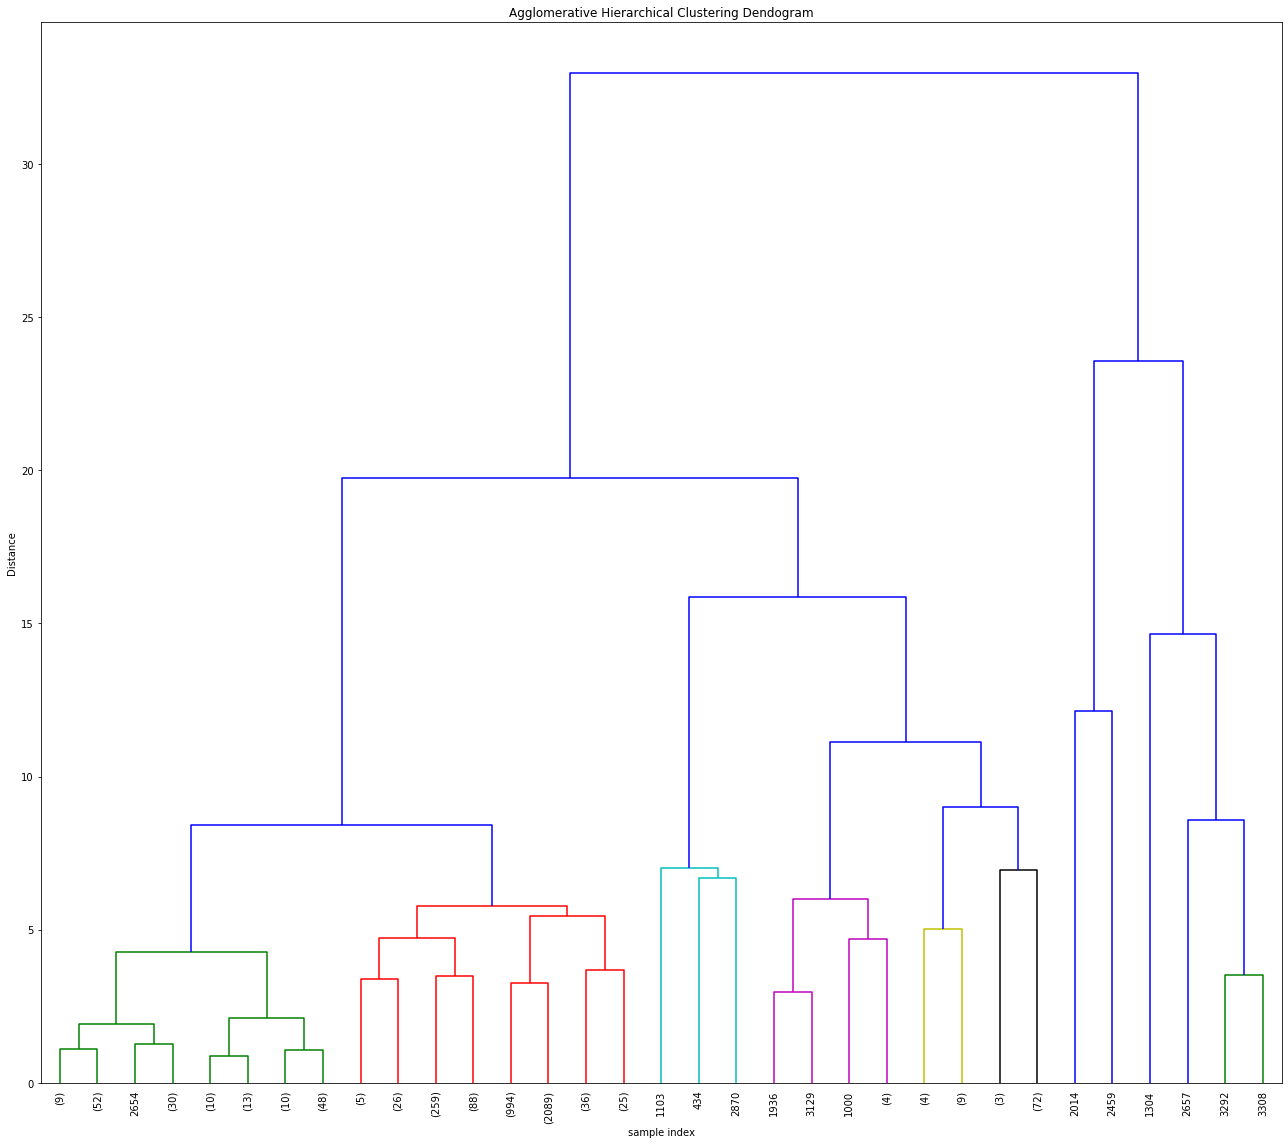

In [54]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(data_scaled, 'complete')
c , cophenet_dist = cophenet(Z, pdist(data_scaled))
print(c)
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

0.9418631226668275


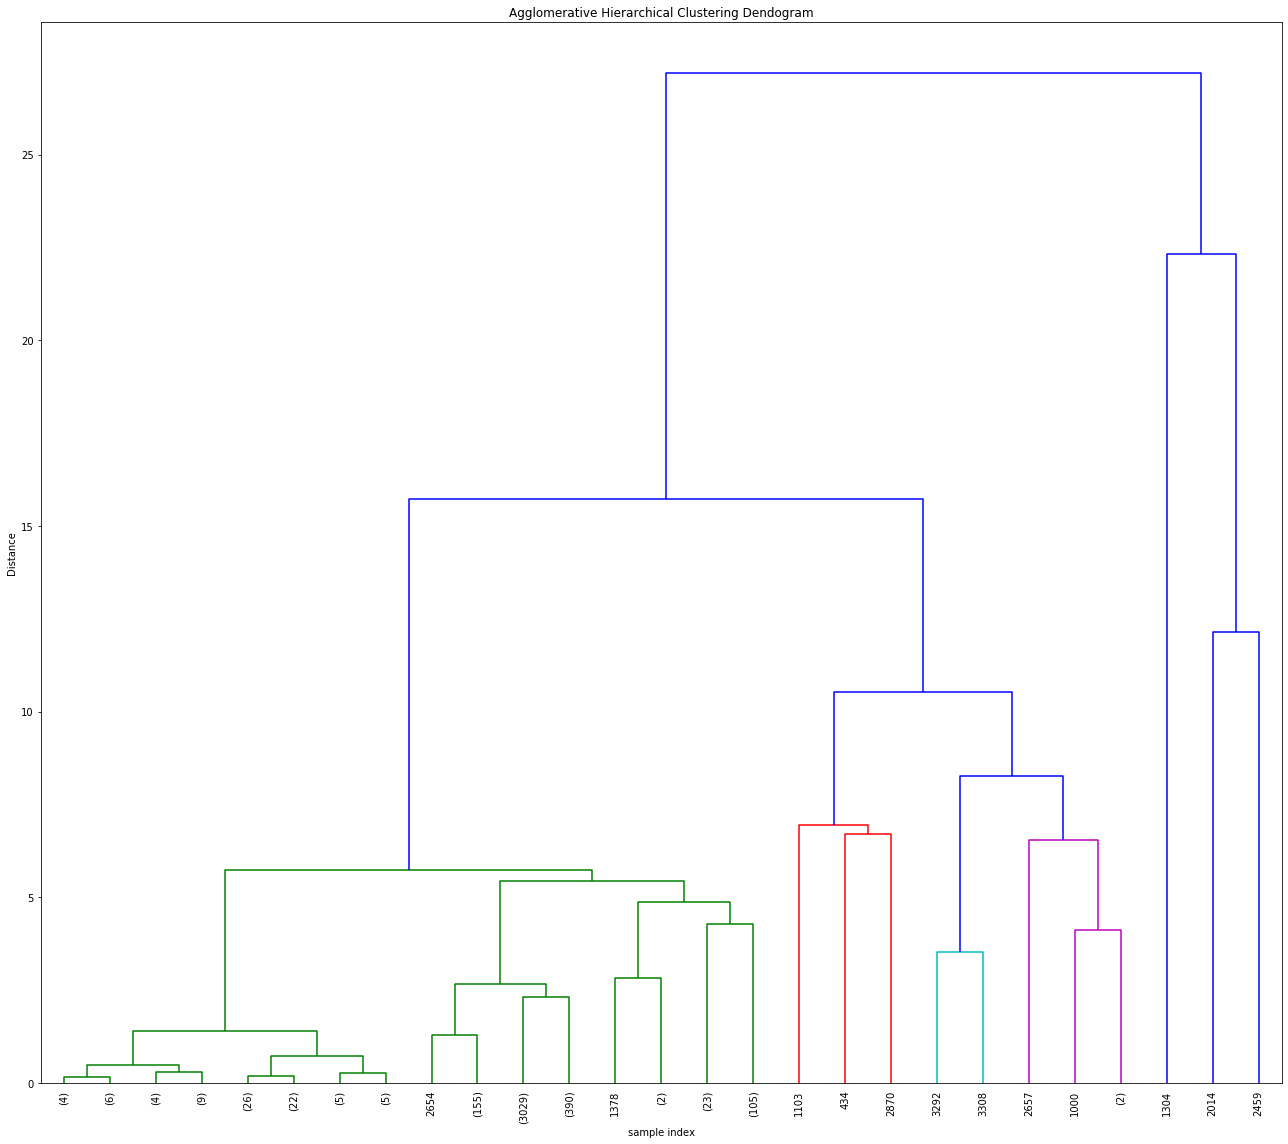

In [55]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(data_scaled, 'average')
c , cophenet_dist = cophenet(Z, pdist(data_scaled))
print(c)
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

0.6556517525025755


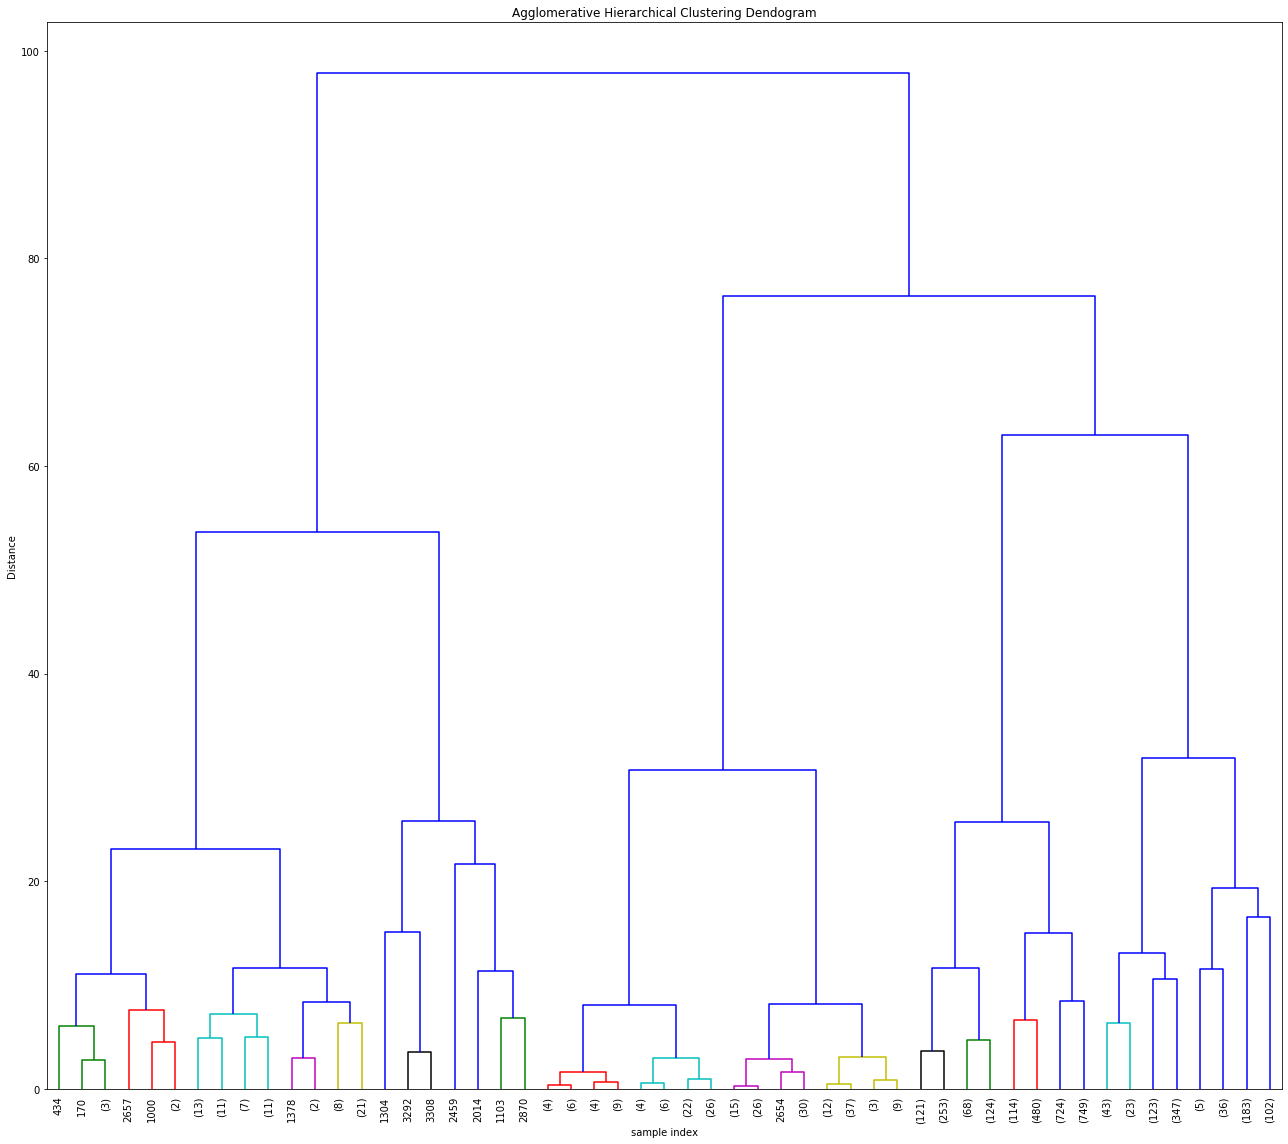

In [56]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(data_scaled, 'ward')
c , cophenet_dist = cophenet(Z, pdist(data_scaled))
print(c)
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

### Going ahead with ward's linkage as 5  clusters are well defined

In [57]:
agg=AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
agg.fit(data_scaled)
data_a=data.copy()
data_a['label']=agg.labels_

In [58]:
data_a.head()

,Total_Sales,Total_Quantity_Purchase,Frequency,Mean_diff_purchase,label
0,759.89,860,71,8.108696,3
1,119.09,303,22,13.571429,3
2,40.53,193,30,15.458333,3
3,3.25,5,3,123.666667,2
4,6.72,16,5,73.600000,3


In [59]:
silhouette_score(data_scaled,agg.labels_)

0.5393839489767975

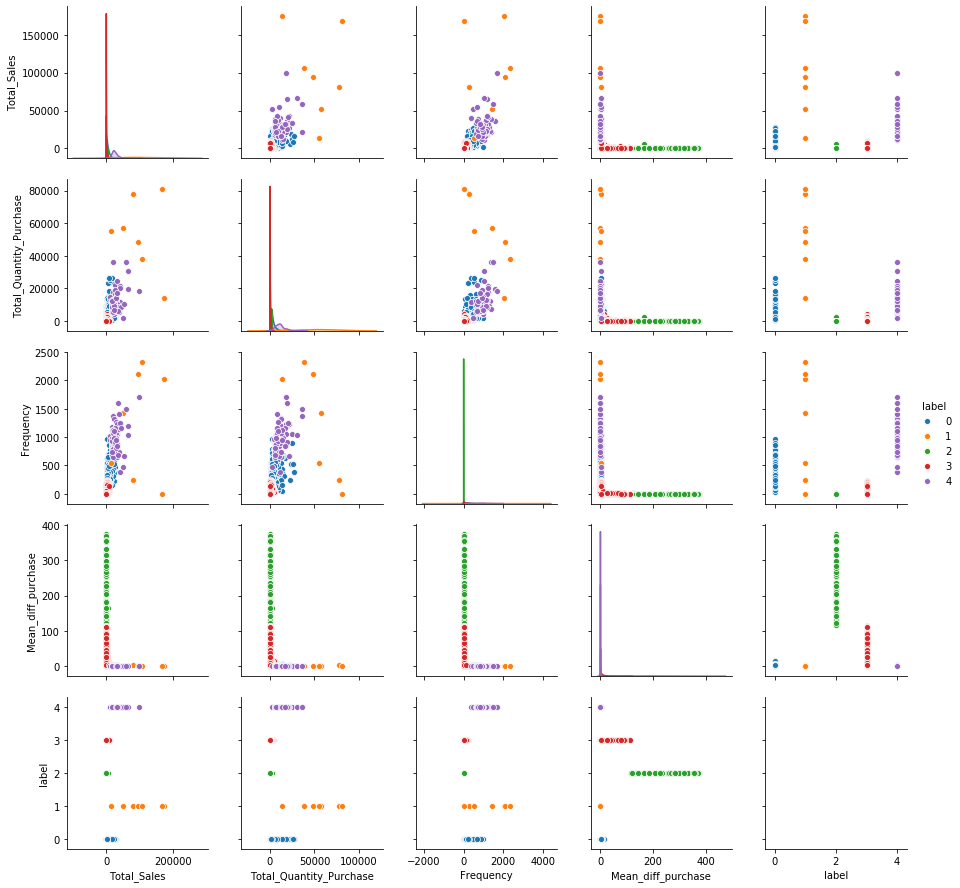

In [60]:
sns.pairplot(data=data_a, hue='label')

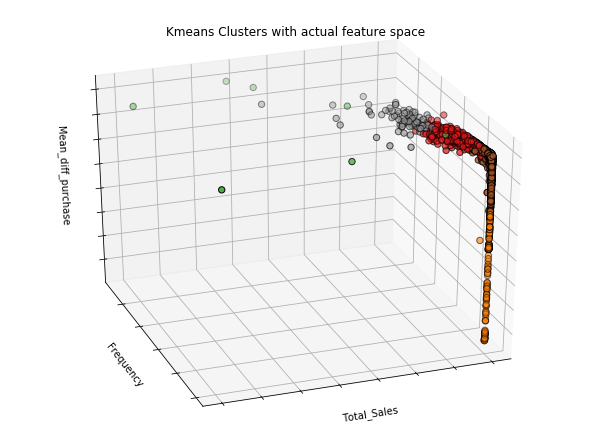

In [61]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=-250)
ax.scatter(data_a['Total_Sales'], data_a['Frequency'], data_a['Mean_diff_purchase'], c=agg.labels_,
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("Kmeans Clusters with actual feature space")
ax.set_xlabel("Total_Sales")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Frequency")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Mean_diff_purchase")
ax.w_zaxis.set_ticklabels([])


plt.show()

In [62]:
data_a['label'].value_counts()

3    2633
0     862
2     214
4      83
1       7
Name: label, dtype: int64

In [63]:
data_a_inertia=data_scaled.copy()
data_a_inertia['label']=agg.labels_

In [64]:
AGC_clusters = data_a_inertia.groupby(['label'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

C0=np.array(Df0.mean())
C1=np.array(Df1.mean())
C2=np.array(Df2.mean())

C0=C0[:-1]
C1=C1[:-1]
C2=C2[:-1]

AGC_I0=0
AGC_I1=0
AGC_I2=0

for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-C2)**2)

agg_inertia=AGC_I0+AGC_I1+AGC_I2 
agg_inertia

2757.846390927246

In [65]:
stack=np.vstack((C0,C1,C2))
pd.DataFrame(stack, columns=data.columns)

,Total_Sales,Total_Quantity_Purchase,Frequency,Mean_diff_purchase
0,0.427153,0.571362,0.934986,-0.410325
1,13.330123,14.191074,5.513723,-0.427036
2,-0.368766,-0.398508,-0.687698,3.520935


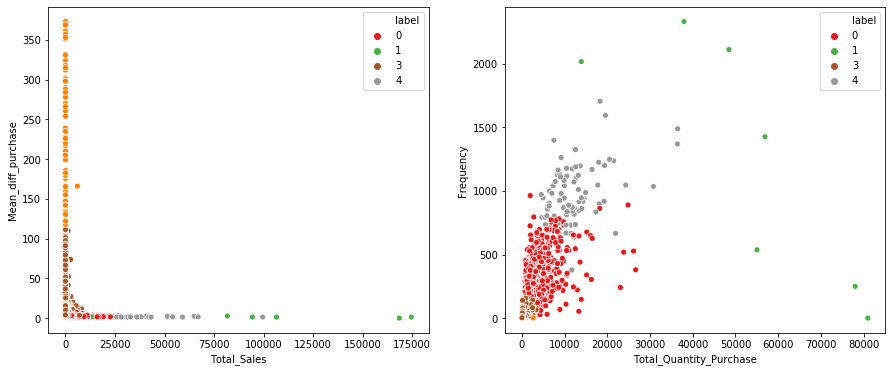

In [66]:
fig, ax= plt.subplots(1,2,figsize=(15,6))
sns.scatterplot(data_a.Total_Sales, data_a.Mean_diff_purchase , hue=data_a.label, ax=ax[0],palette='Set1' )
sns.scatterplot(data_a.Total_Quantity_Purchase, data_a.Frequency, hue=data_a.label, ax=ax[1],palette='Set1')

In [67]:
data_a[data_a['label']==4].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Sales,83.0,28567.548675,13238.242039,11319.360000,21542.655000,24509.840000,31642.875000,99504.330000
Total_Quantity_Purchase,83.0,12138.734940,6307.776094,1940.000000,8079.000000,11007.000000,13788.000000,36461.000000
Frequency,83.0,971.722892,234.882914,379.000000,815.500000,940.000000,1120.000000,1706.000000
Mean_diff_purchase,83.0,1.430825,0.319032,1.159574,1.277397,1.327402,1.440176,3.188034
label,83.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [68]:
for i in [0,1,2,3,4]:
    print(data_a[data_a['label']==i].describe())

        Total_Sales  Total_Quantity_Purchase   Frequency  Mean_diff_purchase  \
count    862.000000               862.000000  862.000000          862.000000   
mean    5780.534014              3544.595128  325.545244            2.257553   
std     4805.019336              3026.850607  143.026088            0.978215   
min      380.000000               415.000000   28.000000            1.125000   
25%     2203.452500              1757.000000  220.000000            1.669291   
50%     4329.005000              2633.500000  288.000000            2.051607   
75%     7739.687500              4355.500000  404.250000            2.642971   
max    28082.540000             26633.000000  964.000000           14.153846   

       label  
count  862.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0  
         Total_Sales  Total_Quantity_Purchase    Frequency  \
count       7.000000                 7.000000     7.000000   
mean    98666.065714

# Inference: Agglomerative creates 5 clusters. 
##### 0- Stocks which are frequently bought and in high demand which bring in moderate income
##### 1- Stocks purchases are irregular and bring in high income.
##### 2- Stocks which are very rarely bought and bring in very low income
##### 3- Stocks purchases are less frequently bought and bring in low income.
##### 4- Stocks purchasing is frequent and brings in good income.


## Key Insights
##### 0- Stocks bring in moderate income and inventory needs to be maintained to meet the demand to supply ratio (less than 5k quantity)
##### 1- Stocks which cater to large scalemarket and bring in maximum income. A very large share of inventory must be invested in these products. This strategy can attract customers overseas due to high supply. (more than 40k quantity)
##### 2 - Stocks with low frequeny and very less income. These stocks can be omitted from future selling
##### 3-  Stocks which bring in low income but purchased once in a while. A small portion of inventory can be allocated as they cater to one set of customers (less than 500 quantity)
##### 4- Stocks which bring in good sales and in demand. Purchases can be classified as wholesalers with quantity more than 10K quantity. 

# Summary

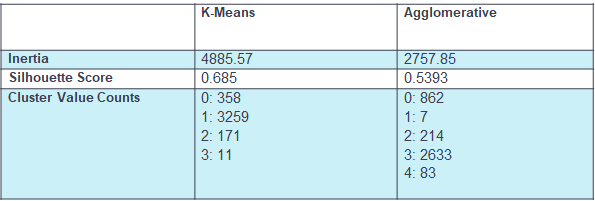

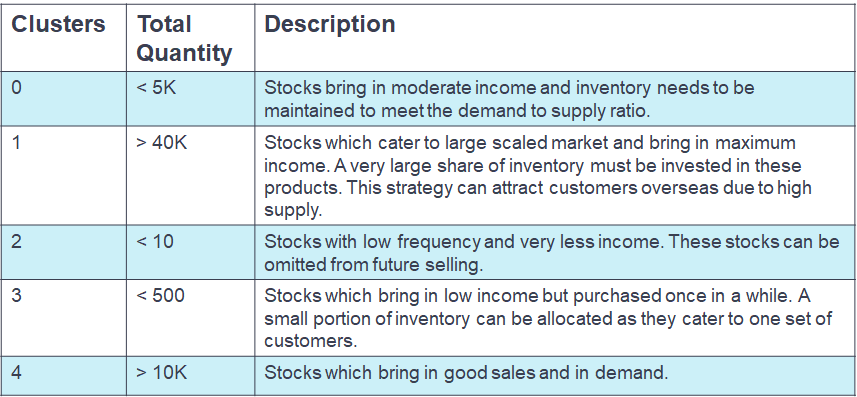